## Optimal Topics Discovery

In [1]:
import numpy as np
import spacy
import gensim
import csv
import pandas as pd

In [2]:
docs = {}

In [3]:
with open('yearbooks_tibble_all.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        year, page, term, count, decade, total = row
        if (year, page) not in docs:
            docs[(year, page)] = []
        if (year, page) in docs:
            docs[(year, page)].append(term) 

In [4]:
del docs[('year', 'page')]

In [5]:
list(docs.keys())[22]

('1870', '120')

In [36]:
# 14 time periods
timed_docs = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [37]:
years_info = []

In [38]:
for doc in docs:
    year, page = doc
    if int(year) >= 1870 and int(year) <=1880:
        timed_docs[0].append(docs[doc])
        if (1870, 1880) not in years_info:
            years_info.append((1870, 1880))
    if int(year) >= 1881 and int(year) <=1895:
        timed_docs[1].append(docs[doc])
        if (1881, 1895) not in years_info:
            years_info.append((1881, 1895))
    if int(year) >= 1896 and int(year) <=1902:
        timed_docs[2].append(docs[doc])
        if (1896, 1902) not in years_info:
            years_info.append((1896, 1902))        
    if int(year) >= 1903 and int(year) <=1908:
        timed_docs[3].append(docs[doc])
        if (1903, 1908) not in years_info:
            years_info.append((1903, 1908))
    if int(year) >= 1909 and int(year) <=1913:
        timed_docs[4].append(docs[doc])
        if (1909, 1913) not in years_info:
            years_info.append((1909, 1913))
            years_info.append((1914, 1918))
    if int(year) >= 1914 and int(year) <=1918:
        timed_docs[5].append(docs[doc])
        if (1914, 1918) not in years_info:    
            years_info.append((1914, 1918))        
    if int(year) >= 1919 and int(year) <=1933:
        timed_docs[6].append(docs[doc])
        if (1919, 1933) not in years_info:    
            years_info.append((1919, 1933))
    if int(year) >= 1934 and int(year) <=1938:
        timed_docs[7].append(docs[doc])
        if (1934, 1938) not in years_info:    
            years_info.append((1934, 1938))
    if int(year) >= 1939 and int(year) <=1945:
        timed_docs[8].append(docs[doc])
        if (1939, 1945) not in years_info:    
            years_info.append((1939, 1945))
    if int(year) >= 1946 and int(year) <=1954:
        timed_docs[9].append(docs[doc])
        if (1946, 1954) not in years_info:   
            years_info.append((1946, 1954))
    if int(year) >= 1955 and int(year) <=1959:
        timed_docs[10].append(docs[doc])
        if (1955, 1959) not in years_info:   
            years_info.append((1955, 1959))
    if int(year) >= 1960 and int(year) <=1964:
        timed_docs[11].append(docs[doc])
        if (1960, 1964) not in years_info:   
            years_info.append((1960, 1964))
    if int(year) >= 1965 and int(year) <=1968:
        timed_docs[12].append(docs[doc])
        if (1965, 1968) not in years_info:   
            years_info.append((1965, 1968))
    if int(year) >= 1969 and int(year) <=1979:
        timed_docs[13].append(docs[doc])
        if (1969, 1979) not in years_info:   
            years_info.append((1969, 1979))
    if int(year) >= 1980 and int(year) <=1989:
        timed_docs[14].append(docs[doc])
        if (1980, 1989) not in years_info:   
            years_info.append((1980, 1989))
    if int(year) >= 1990 and int(year) <=1996:
        timed_docs[15].append(docs[doc])
        if (1990, 1996) not in years_info:  
            years_info.append((1990, 1996))
    if int(year) >= 1997 and int(year) <=2009:
        timed_docs[16].append(docs[doc])
        if (1997, 2009) not in years_info:  
            years_info.append((1997, 2009))


In [39]:
len(years_info)

17

In [40]:
for i, time in enumerate(timed_docs):
    print(years_info[i],len(time))

(1870, 1880) 3361
(1881, 1895) 3694
(1896, 1902) 3099
(1903, 1908) 3209
(1909, 1913) 2756
(1914, 1918) 0
(1919, 1933) 3636
(1934, 1938) 249
(1939, 1945) 896
(1946, 1954) 3095
(1955, 1959) 3105
(1960, 1964) 3135
(1965, 1968) 2705
(1969, 1979) 3555
(1980, 1989) 3376
(1990, 1996) 3004
(1997, 2009) 3347


In [8]:
final_docs = []
times = []

In [9]:
for period in timed_docs:
    times.append(len(period))
    for doc in period:
        final_docs.append(doc)

In [10]:
from gensim.models import LdaSeqModel
from gensim.corpora import Dictionary

In [11]:
from gensim.models.coherencemodel import CoherenceModel

In [12]:
dictionary = Dictionary(final_docs)
corpus = [dictionary.doc2bow(text) for text in final_docs]

## Training new models

In [13]:
from gensim.models import LdaModel


In [14]:
lda_8 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8)

In [15]:
lda_16 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=16)

In [16]:
lda_24 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=24)

In [41]:
lda_32 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=32)

In [45]:
lda_40 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=40)

In [46]:
lda_48 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=48)

In [20]:
cm_16 = CoherenceModel(model=lda_16, corpus=corpus, coherence='u_mass')

In [21]:
cm_16.get_coherence()

-4.541123764275744

In [22]:
cm_24 = CoherenceModel(model=lda_24, corpus=corpus, coherence='u_mass')

In [23]:
cm_24.get_coherence()

-4.54263264616264

In [43]:
cm_32 = CoherenceModel(model=lda_32, corpus=corpus, coherence='u_mass')

In [44]:
cm_32.get_coherence()

-5.097939659895481

In [26]:
cm_8 = CoherenceModel(model=lda_8, corpus=corpus, coherence='u_mass')

In [27]:
cm_8.get_coherence()

-2.0472870557417417

In [47]:
cm_40 = CoherenceModel(model=lda_40, corpus=corpus, coherence='u_mass')

In [48]:
cm_40.get_coherence()

-5.555113284846483

In [49]:
cm_48 = CoherenceModel(model=lda_48, corpus=corpus, coherence='u_mass')

In [50]:
cm_48.get_coherence()

-4.5897834806504525

In [37]:
topics = [8, 16, 24, 32, 40, 48]

In [38]:
scores = [cm_8.get_coherence(), cm_16.get_coherence(), cm_24.get_coherence(), cm_32.get_coherence(), cm_40.get_coherence(), cm_48.get_coherence()]

In [39]:
import seaborn as sns


<Axes: >

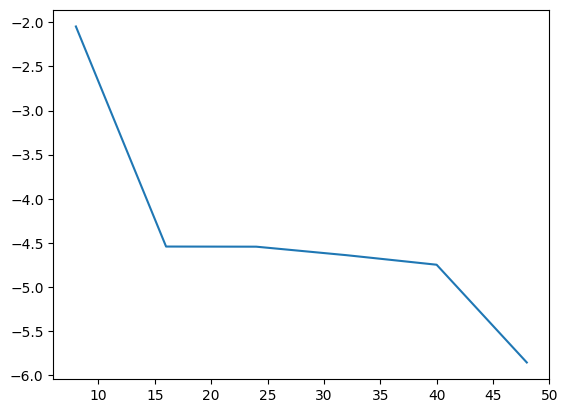

In [40]:
sns.lineplot(x=topics, y=scores)

### Coherence of already trained models

In [32]:
ldaseq_fast = LdaSeqModel.load("new_models/ldaseq_32_topics_14_periods_reverse_cv02")

In [33]:
topics_dtm = ldaseq_fast.dtm_coherence(time=2)

In [34]:
cm_DTM = CoherenceModel(topics=topics_dtm, corpus=corpus, dictionary=dictionary, coherence='u_mass')

In [35]:
print ("DTM Python coherence is", cm_DTM.get_coherence())

DTM Python coherence is -2.263871357030661
